# Sympy 

[Sympy](http://sympy.org) je Python biblioteka za simboličku matematiku. Prednost Sympy-ja je što je potpuno napisan u Pythonu (što je katkad i mana). Mi ćemo u nastavku kolegiju obraditi i puno moćniji Sage, koji je [CAS](http://en.wikipedia.org/wiki/Computer_algebra_system) u klasi Mathematice i Maplea. No Sage nije biblioteka u Pythonu, već CAS koji koristi Python kao programski jezik.

Korištenje Sympy-ja počinje kao i kod ostalih biblioteka, s importiranjem.

In [45]:
from sympy import *

Da bi dobili lijepi $\LaTeX$ izlaz:

In [46]:
from sympy import init_printing
init_printing()

Koristit ćemo i interaktivne widgete, pa ih ovdje učitavamo

In [47]:
from IPython.display import display
from ipywidgets import interact, fixed, interact_manual
import ipywidgets as widgets

## Simboličke varijable

Kako je Sympy samo Python paket, trebamo deklarirati koje simbole ćemo koristiti kao simboličke vatrijable. To možemo napraviti na više načina:

In [48]:
x = Symbol('x')
# ili x,y,z = symbols('x,y,z')
# ili from sympy.abc import x,y,z
# ili var(x:z)

In [5]:
(pi + x)**2

In [6]:
a, b, c = symbols("stranica_a, stranica_b, stranica_c")

In [7]:
type(a)

sympy.core.symbol.Symbol

In [8]:
a

In [9]:
a, b, c = symbols("alpha, beta, gamma")
a**2+b**2+c**2

In [10]:
symbols("x:5")

Možemo navoditi i dodatne pretpostavke:

In [11]:
x = Symbol('x', real=True)

In [12]:
x.is_imaginary

False

In [13]:
x = Symbol('x', positive=True)

In [14]:
x > 0

Možemo kreirati i apstraktne funkcije:

In [15]:
f = Function('f')
f(0)

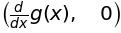

In [16]:
g = Function('g')(x)
g.diff(x), g.diff(a)

### Kompleksni brojevi

Imaginarna jedinica se označava s `I`.

In [17]:
1+1*I

In [18]:
I**2

In [19]:
(x * I + 1)**2

### Razlomci

Postoje tri numerička tipa: `Real`, `Rational`, `Integer`:

In [20]:
r1 = Rational(4,5)
r2 = Rational(5,4)

In [21]:
r1

In [22]:
r1+r2

In [23]:
r1/r2

In [24]:
denom(r1)

### Numerička evaluacija

SymPy može računati u proizvoljnoj točnosti te ima predefinirane matematičke konstante kao: `pi`, `e` te `oo` za beskonačnost.

Funkcija `evalf` ili metoda `N` s ulaznom varijablom `n` računaju izraz na `n` decimala.

In [25]:
pi.evalf(n=50)

In [49]:
y = (x + pi)**2

In [27]:
N(y, 5)

Ukoliko želimo zamijeniti varijablu s konkretnim brojem, to možemo učiniti koristeći funkciju `subs`:

In [28]:
y.subs(x, 1.5)

In [29]:
N(y.subs(x, 1.5))

No `subs` možemo korisiti i općenitije:

In [30]:
y.subs(x, a+pi)

Sympy i Numpy se mogu simultano koristiti:

In [31]:
import numpy

In [32]:
x_vec = numpy.arange(0, 10, 0.1)

In [33]:
y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

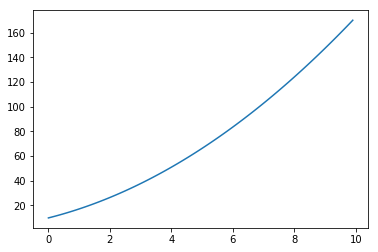

In [34]:
from matplotlib.pyplot import subplots
%matplotlib inline
fig, ax = subplots()
ax.plot(x_vec, y_vec);

Efikasniji kod se postiže funkcijom `lambdify` koja kompajlira Sympy izraz u funkciju:

In [35]:
# prvi argument je lista varijabli funkcije f, u ovom slučaju funckcija je x -> f(x)
f = lambdify([x], (x + pi)**2, 'numpy')

In [36]:
y_vec = f(x_vec)

Razlika u brzini izvođenja:

In [37]:
%%timeit

y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

10 loops, best of 3: 22.6 ms per loop


In [38]:
%%timeit

y_vec = f(x_vec)

The slowest run took 19.02 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.73 µs per loop


Ovdje smo mogli koristiti i [theano](http://deeplearning.net/software/theano/) ili uFuncify.

Pretvaranje stringa u Sympy izraz:

In [39]:
string = '1/(x-1) + 1/(x+1) + x + 1'
izraz = sympify(string)
izraz

Jedan interaktivan primjer:

In [50]:
x = Symbol('x')
def factorit(n):
    return display(Eq(x ** n - 1, factor(x ** n - 1)))

`Eq` kreira matematičke jednakosti, tj. jednadžbe.

In [41]:
factorit(18)

In [51]:
interact(factorit,n=(2,20));

 17               ⎛ 16    15    14    13    12    11    10    9    8    7    6
x   - 1 = (x - 1)⋅⎝x   + x   + x   + x   + x   + x   + x   + x  + x  + x  + x 

    5    4    3    2        ⎞
 + x  + x  + x  + x  + x + 1⎠

In [52]:
interact(factorit,n=(1,20,2));

 11               ⎛ 10    9    8    7    6    5    4    3    2        ⎞
x   - 1 = (x - 1)⋅⎝x   + x  + x  + x  + x  + x  + x  + x  + x  + x + 1⎠

In [53]:
interact(factorit,n=widgets.widget_int.IntSlider(min=2,max=20,step=1,value=2));

 9               ⎛ 2        ⎞ ⎛ 6    3    ⎞
x  - 1 = (x - 1)⋅⎝x  + x + 1⎠⋅⎝x  + x  + 1⎠

## Algebarske manipulacije

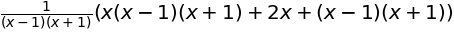

In [45]:
together(izraz)

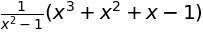

In [46]:
cancel(together(izraz))

In [47]:
(x+1)*(x+2)*(x+3)

In [48]:
expand((x+1)*(x+2)*(x+3))

`expand` prima dodatne argumente. Npr. `trig=True`:

In [49]:
sin(a+b)

In [50]:
expand(sin(a+b), trig=True)

In [51]:
simplify(sin(a)**2 + cos(a)**2)

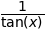

In [52]:
simplify(cos(x)/sin(x))

In [53]:
f1 = 1/((a+1)*(a+2))

In [54]:
apart(f1)

In [55]:
f2 = 1/(a+2) + 1/(a+3)

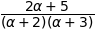

In [56]:
together(f2)

## Analiza

### Deriviranje

In [6]:
y

In [7]:
diff(y**2, x)

Više derivacije:

In [8]:
diff(y**2, x, x)

In [9]:
diff(y**2, x, 2)

In [54]:
from sympy.abc import x,y,z
# ili npr. symbols ('x:z')

In [55]:
f = sin(x*y) + cos(y*z)

Želimo izračunati $$\frac{\partial^3f}{\partial  x \partial y^2}$$

In [39]:
diff(f, x, 1, y, 2)

In [56]:
def deriv(f):
    display(diff(f,x))
interact_manual(deriv, f='x');

-sin(x)

### Integracija

In [65]:
f

In [66]:
integrate(f, x)

             ⎛⎧    0       for y = 0⎞
             ⎜⎪                     ⎟
x⋅cos(y⋅z) + ⎜⎨-cos(x⋅y)            ⎟
             ⎜⎪──────────  otherwise⎟
             ⎝⎩    y                ⎠

Definitni integrali:

In [67]:
integrate(f, (x, -1, 1))

Nepravi integrali:

In [68]:
integrate(exp(-x**2), (x, -oo, oo))

### Sume i produkti

In [69]:
n = Symbol("n")

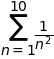

In [70]:
Sum(1/n**2, (n, 1, 10))

In [71]:
Sum(1/n**2, (n,1, 10)).evalf()

In [72]:
Sum(1/n**2, (n, 1, oo)).evalf()

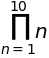

In [73]:
Product(n, (n, 1, 10))

### Limesi

In [74]:
limit(sin(x)/x, x, 0)

In [75]:
f

In [76]:
diff(f, x)

$$ \frac{\partial f(x,y)}{\partial x} = \lim_{h\to 0}\frac{f(x+h,y)-f(x,y)}{h}$$

In [77]:
h = Symbol("h")

In [78]:
limit((f.subs(x, x+h) - f)/h, h, 0)

In [79]:
limit(1/x, x, 0, dir="+")

In [80]:
limit(1/x, x, 0, dir="-")

### (Taylorovi) redovi

In [81]:
series(exp(x), x)

Rastav oko $x=1$:

In [82]:
series(exp(x), x, 1)

In [83]:
series(exp(x), x, 1, 10)

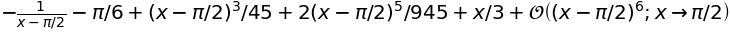

In [84]:
tan(x).series(x,pi/2)

In [85]:
s1 = cos(x).series(x, 0, 5)
s1

In [86]:
s2 = sin(x).series(x, 0, 2)
s2

In [87]:
expand(s1 * s2)

S metodom `removeO` se možemo riješiti $\mathcal{O}$ dijela:

In [88]:
expand(s1.removeO() * s2.removeO())

Ali oprezno s time:

In [89]:
(cos(x)*sin(x)).series(x, 0, 6)

Reziduumi:

In [90]:
residue(2/sin(x), x, 0)

## Linearna algebra

### Matrice

In [57]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

In [58]:
A = Matrix([[m11, m12],[m21, m22]])
A

⎡m₁₁  m₁₂⎤
⎢        ⎥
⎣m₂₁  m₂₂⎦

In [31]:
b = Matrix([[b1], [b2]])
b

⎡b₁⎤
⎢  ⎥
⎣b₂⎦

In [32]:
A**2

⎡    2                               ⎤
⎢ m₁₁  + m₁₂⋅m₂₁    m₁₁⋅m₁₂ + m₁₂⋅m₂₂⎥
⎢                                    ⎥
⎢                                 2  ⎥
⎣m₁₁⋅m₂₁ + m₂₁⋅m₂₂   m₁₂⋅m₂₁ + m₂₂   ⎦

In [14]:
A * b

⎡b₁⋅m₁₁ + b₂⋅m₁₂⎤
⎢               ⎥
⎣b₁⋅m₂₁ + b₂⋅m₂₂⎦

In [59]:
def funkcija(A,f):
    return display(getattr(A,f)())
interact(funkcija,A = fixed(A), f=['det','inv','adjoint','charpoly']);

## Rješavanje jednadžbi

In [99]:
solve(x**2 - 1, x)

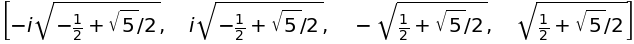

In [100]:
solve(x**4 - x**2 - 1, x)

In [101]:
eq = Eq(x**3 + 2*x**2 + 4*x + 8, 0)
eq

In [102]:
solve(eq, x)

Sustavi jednadžbi:

In [103]:
solve([x + y - 1, x - y - 1], [x,y])

In [104]:
solve([x + y - a, x - y - c], [x,y])

Više o interaktivnim widgetima možete naučiti preko primjera koji se nalaze [ovdje](https://github.com/jupyter-widgets/ipywidgets/tree/master/docs/source/examples). 

In [105]:
from verzije import *
from IPython.display import HTML
HTML(print_sysinfo()+info_packages('sympy,matplotlib,IPython,numpy, ipywidgets'))

Python verzija,3.5.3
kompajler,GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
sustav,Linux
broj CPU-a,8
interpreter,64bit
sympy verzija,1.0
matplotlib verzija,2.0.0
IPython verzija,5.3.0
numpy verzija,1.11.3
ipywidgets verzija,6.0.0


## Zadaci za vježbanje

1) Napišite funkciju koja prima listu izraza, varijablu i točku, a ispisuje vrijednost svakog izraza s liste u toj točki. Funkcija treba izgledati ovako

```
def evaluiraj(izrazi, x, x0):
"""
Za svaki izraz iz izrazi funkcija ispisuje vrijednost izraza za x = x0
"""
```

2) Izračunajte 
$\frac{d}{dx}\sin(x)e^x,\,
\frac{\partial}{\partial x}\sin(xy)e^x,\,
\frac{\partial^2}{\partial x\partial y}\sin(xy)e^x.$

3) Izraz `(x**2 + 3*x + 1)/(x**3 + 2*x**2 + x)` pojednostavite do izraza `1/(x**2 + 2*x + 1) + 1/x`

4) Izraz `(a**b)**c)` pojednostavite do izraza `a**(b*c)`

5) Napišite funkciju koja rješava (egzaktno) kvadratnu jednadžbu.

6) Napišite funkciju koja za ulazne parametre prima funkciju (danu simboličkim izrazom) te točku (tj. broj) a crta danu funkciju i njenu tangentu u danoj točki. Učinite funkciju interaktivnom na način da se može birati funkcija (upisivanjem u polje) te točka (klizačem).

7) Izračunajte vektorski produkt vektora $(a,b,b)$ i $(b,a,a)$

8) Riješite Cauchyjev problem
$$\begin{align}
u'(t)&=-au(t)+b,\\
u(0)&=I
\end{align}$$
i pojednostavite dobijeno rješenje. Ovdje su $a$, $b$ i $I$ nepoznate konstante.

9)  Riješite diferencijalnu jednadžbu
$$ y(t) + \frac{d^2}{dt^2}y(t) = 0$$
i nacrtajte partikularna rješenja koristeći sympy modul za crtanje. 